## Scraping job listings from Indeed.com¶

<img src="./logo-renato-barroco.png" >

# 1. Web Scrapping steps

In [1]:
# Indeed.com
URL = "https://www.indeed.com/jobs?q=data%20analyst&l=Nashville&vjk=f92dc432c9a65cd8"

In [2]:
import requests
import bs4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
sns.set(style="darkgrid")

from tqdm import tqdm
from bs4 import BeautifulSoup

Indeed.com - Indeed is a website "text" envinroment so Beautiful soup would be sufficient to scrapping. If we were talking about glassdoor, for example, seleium library would be necessary.

In [3]:
# Resource object
indeed_source = requests.get(URL)

print(indeed_source)

<Response [200]>


In [4]:
# Applying Beautiful soup on the source_indeed
soup = BeautifulSoup(indeed_source.text, 'html.parser')

In [5]:
# After applying it, soup became a text file parsed by html.parser, which we can access all the div with "results" on it.
indeed_results = soup.find_all('div', class_='result')

In [6]:
len(indeed_results)

15

In [7]:
#Looking into the indeed_results
print(indeed_results[11].prettify())

<div class="jobsearch-SerpJobCard unifiedRow row result" data-jk="679d3ede04cb7748" data-tn-component="organicJob" id="p_679d3ede04cb7748">
 <h2 class="title">
  <a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/rc/clk?jk=679d3ede04cb7748&amp;fccid=c78fdfc4443d4537&amp;vjs=3" id="jl_679d3ede04cb7748" onclick="setRefineByCookie([]); return rclk(this,jobmap[11],true,0);" onmousedown="return rclk(this,jobmap[11],0);" rel="noopener nofollow" target="_blank" title="Business Analyst">
   Business
   <b>
    Analyst
   </b>
  </a>
  <span class="new">
   new
  </span>
 </h2>
 <div class="sjcl">
  <div>
   <span class="company">
    <a class="turnstileLink" data-tn-element="companyName" href="/cmp/Tcs" onmousedown="this.href = appendParamsOnce(this.href, 'from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=679d3ede04cb7748&amp;jcid=c78fdfc4443d4537')" rel="noopener" target="_blank">
     TCS
    </a>
   </span>
   <span class="ratingsDisplay">
    <a aria-label="Company 

In [8]:
# Extracting location
location = [indeed_result.find('span', class_='location')
             for indeed_result in indeed_results]

location_text = []
for element in location:
    if element == None:
        location_text.append(element)
    else:
        location_text.append(element.text)

        
location_text

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'La Vergne, TN 37086',
 None,
 'Nashville, TN',
 None,
 'La Vergne, TN 37086']

In [9]:
# Extracting companies
companies = [indeed_result.find ('span', class_='company').text.replace('\n','')
             for indeed_result in indeed_results]
companies

['GEODIS',
 'QuaverEd, Inc',
 'Ryder System',
 'Amazon.com Services LLC',
 'Admin/Med/IT',
 'Ramsey Solutions',
 'OMNICOMMANDER',
 'Sarah Cannon Network',
 'Verbatim Pharma',
 'Randstad',
 'Thompson Machinery - Caterpillar',
 'TCS',
 'OneOncology',
 'UnitedLex',
 'VET ech']

In [10]:
# Extracting Title
titles = [indeed_result.find ('a', class_='turnstileLink').text.replace('\n','')
             for indeed_result in indeed_results]
titles

['Data Analyst - Sales Performance',
 'Business Data Analyst',
 'Data Analyst II',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'SEO Data Analyst',
 'Manager, Clinical Data Analyst',
 'Senior Data Analyst',
 'Business Analyst',
 'Data Analyst',
 'Business Analyst',
 'SENIOR DATA ANALYST',
 'Data Analyst',
 'Business Analyst']

In [11]:
# Extracting salaries and keeping them in a list;
salaries = []
for indeed_result in indeed_results:
    try:
        salaries.append(indeed_result.find('span', class_='no-wrap').text.replace('\n',''))
    except:
        salaries.append(None)
salaries

[None,
 'Up to $55,000 a year',
 None,
 None,
 None,
 None,
 None,
 None,
 '$75,000 - $85,000 a year',
 None,
 None,
 None,
 None,
 None,
 '$40 - $45 an hour']

In [12]:
# Job reviews inside of a list:
job_reviews = []
for indeed_result in indeed_results:
    try:
        job_reviews.append(indeed_result.find('span', class_='slNoUnderline').text.split(' ')[0].replace(',',''))
    except:
        job_reviews.append(None)
        
job_reviews

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
# Job summary inside of a list:
job_summary = []
for indeed_result in indeed_results:
    try:
        job_summary.append(indeed_result.find('div', class_='summary').text.replace('\n', ''))
    except:
        job_summary.append(None)
        
job_summary

[None,
 'Sales Forecasting - 3 Year Forward Customer Renewals.3+ years of experience, preferably in a sales-driven technology based company.',
 None,
 None,
 'Ability to learn to utilize SAS and Tableau to manage data and create data visualization aids to provide actionable data to key stakeholders.',
 None,
 None,
 None,
 'This will be in conjunction to managing the costing data project with LSP and Airlines, which is required for input into the data system.',
 None,
 'Provide insight into the data’s meaning and how it can be used to make data-driven decisions.Manage the Thompson Machinery data warehouse to ensure accuracy…',
 None,
 'Work closely with our BI team, as well as software engineers and clinical & strategic data analysts to enhance our data warehouse and design our business logic…',
 None,
 'Business analyst: 1 year (Preferred).Bachelor’s in Business Administration or Equivalent with 5 years of related experience is must.']

## Creating functions for each scrapping

In [14]:
# Extracting location (C programming style, FUN!)
def extract_location_from_result_C(result):
    location = []
    for indeed_result in result:
        if indeed_result == None:
            location.append(None)
        else:
            location.append(indeed_result.find('span', class_='location'))
    
    location_text =[]      
    for element in location:
        if element != None:
            location_text.append(element.text)
        else:
            location_text.append(element)
            
    return location_text

In [15]:
# Extracting Location_v2
def extract_location_from_result(result):
    try:
        return result.find('div', class_='location').text
    except:
        return None    

In [16]:
# Extracting companies
def extract_companies_from_result(result):
    try:
        return result.find ('span', class_='company').text.replace('\n','')
    except:
        return None

In [17]:
# Extracting Titles
def extract_title_from_result(result):
    return result.find ('a', class_='turnstileLink').text.replace('\n','')

In [18]:
# Extracting Salaries
def extract_salaries_from_result(result):
    try:
        return result.find('span', class_='no-wrap').text.replace('\n','')
    except:
        return None #No salary

In [19]:
# Extracting Jobs_reviews
def extract_reviews_from_result(result):
    try:
        return result.find('span', class_='slNoUnderline').text.split(' ')[0].replace(',','')
    except:
        return None #No review

In [20]:
# Extracting Summary
def extract_summary_from_result(result):
    try:
        return result.find('div', class_='summary').text.replace('\n','')
    except:
        return None #No summary

In [21]:
# Functions in practice
indeed_results = soup.find_all('div', class_='result')

locations = [extract_location_from_result(indeed_result) for indeed_result in indeed_results]

companies = [extract_companies_from_result(indeed_result) for indeed_result in indeed_results]

titles = [extract_title_from_result(indeed_result) for indeed_result in indeed_results]

salaries = [extract_salaries_from_result(indeed_result) for indeed_result in indeed_results]

reviews = [extract_reviews_from_result(indeed_result) for indeed_result in indeed_results]

summaries = [extract_summary_from_result(indeed_result) for indeed_result in indeed_results]

print(f'Locations: {locations}\n')
print(f'Companies: {companies}\n')
print(f'Titles: {titles}\n')
print(f'Salaries: {salaries}\n')
print(f'Reviews: {reviews}\n')
print(f'Summaries: {summaries}\n')

Locations: [None, 'Nashville, TN 37203', None, None, 'Nashville, TN', None, None, None, 'United States', None, None, None, None, None, None]

Companies: ['GEODIS', 'QuaverEd, Inc', 'Ryder System', 'Amazon.com Services LLC', 'Admin/Med/IT', 'Ramsey Solutions', 'OMNICOMMANDER', 'Sarah Cannon Network', 'Verbatim Pharma', 'Randstad', 'Thompson Machinery - Caterpillar', 'TCS', 'OneOncology', 'UnitedLex', 'VET ech']

Titles: ['Data Analyst - Sales Performance', 'Business Data Analyst', 'Data Analyst II', 'Data Analyst', 'Data Analyst', 'Data Analyst', 'SEO Data Analyst', 'Manager, Clinical Data Analyst', 'Senior Data Analyst', 'Business Analyst', 'Data Analyst', 'Business Analyst', 'SENIOR DATA ANALYST', 'Data Analyst', 'Business Analyst']

Salaries: [None, 'Up to $55,000 a year', None, None, None, None, None, None, '$75,000 - $85,000 a year', None, None, None, None, None, '$40 - $45 an hour']

Reviews: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

<img src="./indeed-confirmation-2.png"/>

Above we have a simple check to confirm that our data is reflecting correclty the website.

# 2. Web scrapping exponential

In [29]:
URL_full = 'https://www.indeed.com/jobs?q=data%20analyst&l={}&vjk=f92dc432c9a65cd8'
max_result_per_city = 1000

results = []

# Base on linkedin the first 15 cities bellow are the top to start living,
# https://www.linkedin.com/pulse/top-15-us-cities-launch-your-career-george-anders/

for city in set(['St.+Louis', 'Milwaukee', 'Cleveland', 'Cincinnati', 'Indianapolis',
                 'Kansas+City', 'Pittsburgh', 'Detroit', 'Columbus','Houston', 'Durham',
                 'Charlotte', 'San+Antonio', 'Phoenix', 'Dallas-Fort+Worth']):
    print('City: ', city)
    for element in tqdm(range(0, max_result_per_city, 13)):
        # requesting data and building a list appended from it.
        URL = URL_full.format(city, element)
        indeed_source = requests.get(URL)
        indeed_results_full = BeautifulSoup(indeed_source.text, 'html.parser')
        # By passing the element city on the .append() method we can grab the city as well, for each job
        results.append([indeed_results_full.find_all('div', class_='result'), city])
        

  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Milwaukee


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  St.+Louis


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Cleveland


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Pittsburgh


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Cincinnati


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Columbus


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Charlotte


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Detroit


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Durham


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Kansas+City


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Houston


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  San+Antonio


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Indianapolis


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Phoenix


  0%|                                                                                           | 0/77 [00:00<?, ?it/s]

City:  Dallas-Fort+Worth


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:31<00:00,  2.48it/s]


In [30]:
print(f'{len(results)} pages scraped.')

1155 pages scraped.


# 3. Creating Data Frame

In [31]:
indeed_data = results.copy()

In [32]:
len(indeed_data)

1155

In [33]:
# One dimension of the data 'Content'
indeed_data[0][0]

[<div class="jobsearch-SerpJobCard unifiedRow row result" data-ci="356944272" data-empn="8857116523758278" data-jk="947ebaa9754ed699" id="pj_947ebaa9754ed699">
 <style>
 .jobcard_logo{margin:6px 0}.jobcard_logo img{width:auto;max-width:80px;max-height:30px}.jasxrefreshcombotst .jobcard_logo img{max-height:2rem;max-width:100%}
 </style>
 <h2 class="title">
 <a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0D_S_Bp26r6tmG_kKxpmEktsuqHaNMuK3wVOID2ynVpI4RRqiGHRx6Z-bNHyDFktN1LVzyOeEVS1FOZMiCyYKTuHfAmwtQ0vvuHlxIlVJDuRgWmKBs3kCuqkXqDPSNiSFfhE0AUeiqokSLd2NWO6uAQGHvdQUjE2snhVTFHYzYZxY2UhTrgjnOTDZ8cTOddijkSf3zx7oqzwGtEyQzMOLYxJXOS3n4-fQJJF_60CEIw-i-UC-rxiaEz2wvRKRCJt9IT-qnq7XvZUxkbg3kDea-OOauC7LIB04U8czuoVIUG8KQEGAXeFWSFeKxLhIiHzfX2Rb2_L_w5LfuXWdXh0q91AFEBbu_vDZAsKGgemjO337EAZyMZXeDm8B4GxwJJkQX136f6FCwnXSuqOkCR8kiHhLdQNVOywGeDYjhvNnDyCKyIKcDYNL74jLYTe9u2zMF1MUWVMfIXvA==&amp;p=0&amp;fvj=0&amp;vjs=3" id="sja0" onclick="setRefineByCookie([]); sjoc('

In [34]:
# Another dimension of the data 'City'
indeed_data[0][1]

'Milwaukee'

In [35]:
# Lists for each category we want to extract that from our scrapped data
cities = []
locations = []
companies = []
titles = []
salaries = []
summaries = []

pages = 0

for page in indeed_data:
    works = page[0]
    city = page[1]
    
    # Counter for each 500 pages;
    pages +=1
    if pages % 100 == 0:
        print(f'{pages} of {len(indeed_data)}.')
        
    for work in works:
        cities.append(city)
        locations.append(extract_location_from_result(work))
        companies.append(extract_companies_from_result(work))
        titles.append(extract_title_from_result(work))
        salaries.append(extract_salaries_from_result(work))
        summaries.append(extract_summary_from_result(work))

# Building DataFrame
columns = ['City', 'Location', 'Title', 'Company', 'Summary', 'Salary']
data = [cities, locations, titles, companies, summaries, salaries]
indeed_df = pd.DataFrame(dict(list(zip(columns, data))))

100 of 1155.
200 of 1155.
300 of 1155.
400 of 1155.
500 of 1155.
600 of 1155.
700 of 1155.
800 of 1155.
900 of 1155.
1000 of 1155.
1100 of 1155.


In [48]:
# Writting the data not cleaned to a csv file.
indeed_df.to_csv('job_data_final0.csv', index=False)

In [40]:
indeed_df = pd.read_csv('job_data_final0.csv')

In [41]:
results_df = indeed_df.copy()

In [42]:
results_df.isna().sum()

City           0
Location    6007
Title          0
Company        0
Summary     4724
Salary      5743
dtype: int64

##### comment
I can see many NaN values, specially in the topic that most interest us which is salary.

In [43]:
results_df['Title'].value_counts()

Data Analyst                                                1881
Data Analyst Intern                                          224
Business Analyst                                             209
Junior Data Analyst                                          151
Financial Data Analyst                                       134
                                                            ... 
Data Analytics Technologies, Big Data - Senior Associate       1
Senior Specialist, Federal Data Analytics / Governance         1
Web Data Analyst (South of Milwaukee)                          1
Senior IT Business Analyst (Revenue Cycle Applications)        1
eCommerce Sales Analyst                                        1
Name: Title, Length: 117, dtype: int64

In [44]:
results_df.tail()

,City,Location,Title,Company,Summary,Salary
6763,San+Antonio,NaN,Financial Analyst,"Finlays, Americas",Ability to analyze and interpret data.Ability ...,"Up to $59,000 a year"
6764,San+Antonio,NaN,"Data Analyst - San Antonio, TX",UnitedHealth Group,NaN,NaN
6765,San+Antonio,NaN,Telecom Data Analyst,I.T. Personnel Solutions,6 months data entry experience.Perform accurat...,NaN
6766,San+Antonio,NaN,Data Development Analyst,BRS,NaN,NaN
6767,San+Antonio,NaN,Data Analyst,Huntington Ingalls Industries Inc.,NaN,NaN


In [45]:
results_df.shape

(6768, 6)

In [46]:
# Checking the number salaries the dataframe has by city
results_df.groupby('City')[['Salary']].count()

,Salary
City,
Cincinnati,47
Cleveland,61
Columbus,42
Houston,306
Milwaukee,0
Pittsburgh,520
San+Antonio,49
St.+Louis,0


In [47]:
# 4. Cleaning and organizing data
results_df['Salary'].value_counts()

$80,000 - $110,000 a year    195
$75,000 - $100,000 a year     69
$27 - $32 an hour             68
$70,000 - $100,000 a year     68
$40 - $50 an hour             68
$55,000 - $70,000 a year      64
$65,000 - $75,000 a year      63
$43,694 - $64,000 a year      63
$60,000 - $70,000 a year      61
$75,000 a year                53
$55 - $70 an hour             53
Up to $59,000 a year          46
$38 - $60 an hour             35
$14 - $16 an hour             32
$70 - $72 an hour             28
$17.50 an hour                14
$60 - $90 an hour             14
$24 - $30 an hour             14
$35,000 - $50,000 a year       7
$40 - $45 an hour              5
$48,000 - $52,000 a year       3
$10 an hour                    2
Name: Salary, dtype: int64

In [48]:
indeed_slim = results_df.copy()

In [49]:
indeed_slim['Location'].isna().sum()

6007

In [50]:
indeed_slim.shape

(6768, 6)

In [51]:
# Since I have already have 'City', I'll be removing the feature Location just because It has a lot of None values.
del indeed_slim['Location']

In [52]:
indeed_slim

,City,Title,Company,Summary,Salary
0,Milwaukee,Data Analyst,ManpowerGroup,NaN,NaN
1,Milwaukee,Data Analyst,NTT DATA Services,NaN,NaN
2,Milwaukee,Financial Data Analyst,Independent Care Health Plan,NaN,NaN
3,Milwaukee,Facilities Analyst Internship - Paid (South of...,Uline,NaN,NaN
4,Milwaukee,"Technical Business Analyst, Jr",Sprecher Brewing Company,NaN,NaN
...,...,...,...,...,...
6763,San+Antonio,Financial Analyst,"Finlays, Americas",Ability to analyze and interpret data.Ability ...,"Up to $59,000 a year"
6764,San+Antonio,"Data Analyst - San Antonio, TX",UnitedHealth Group,NaN,NaN
6765,San+Antonio,Telecom Data Analyst,I.T. Personnel Solutions,6 months data entry experience.Perform accurat...,NaN
6766,San+Antonio,Data Development Analyst,BRS,NaN,NaN


In [53]:
print(f'before dropping duplicates: {indeed_slim.shape}')
indeed_slim.drop_duplicates(subset=['City', 'Title', 'Company', 'Salary'], keep='first', inplace=True)
print(f'after dropping duplicates: {indeed_slim.shape}')

before dropping duplicates: (6768, 5)
after dropping duplicates: (179, 5)


In [54]:
indeed_slim.isna().sum()

City         0
Title        0
Company      0
Summary    131
Salary     154
dtype: int64

In [55]:
indeed_slim['City'].value_counts()

Cleveland      30
Houston        25
San+Antonio    23
St.+Louis      23
Milwaukee      22
Pittsburgh     21
Columbus       18
Cincinnati     17
Name: City, dtype: int64

In [56]:
# Writting the data not totally cleaned to a csv file.
indeed_slim.to_csv('job_data_final1.csv', index=False)

# 4. Cleaning DataFrame

In [70]:
# Continuing the work
indeed_slim = pd.read_csv('./job_data_final1.csv')

In [71]:
indeed_slim.isna().sum()

City         0
Title        0
Company      0
Summary    131
Salary     154
dtype: int64

In [72]:
# The cities that we would like to have the salary we won't have much of it.
indeed_slim['Salary'].notnull().sum()

25

In [217]:
# Removing records where the salary is None
temp = indeed_slim.Salary.notnull()
indeed_filtered = indeed_slim[temp]

Now, since I don't have much data left I have to work the converting hour to year Salary

In [218]:
indeed_filtered['Salary'] = indeed_filtered['Salary'].str.replace(' a year', '')
indeed_filtered['Salary'] = indeed_filtered['Salary'].str.replace(' an hour', '')
indeed_filtered['Salary'] = indeed_filtered['Salary'].str.replace('$', '')
indeed_filtered['Salary'] = indeed_filtered['Salary'].str.replace('Up to ', '')
indeed_filtered['Salary'] = indeed_filtered['Salary'].str.replace(',', '')

In [219]:
avg_salary = []

for i in indeed_filtered['Salary']:
    temp = i.split()
    if len(temp) == 3:
        temp_summed = (float(temp[0]) + float(temp[2]))/2
        if temp_summed < 200:
            temp_summed = temp_summed*52*40
    else:
        if float(temp[0]) < 20:
            temp_summed = float(temp[0])*52*40
        else:
            temp_summed = float(temp[0])
    avg_salary.append(temp_summed)

indeed_filtered['Salary'] = avg_salary

In [220]:
indeed_filtered['Salary']

61     65000.00000
76     87500.00000
77     85000.00000
79     61360.00000
80     93600.00000
81     95000.00000
83     95000.00000
84     95000.00000
87     62500.00000
93     20800.00000
98     95000.00000
99     36400.00000
106    56160.00000
112    88400.00000
116   147680.00000
128   156000.00000
133   130000.00000
135    75000.00000
136    53847.00000
137    70000.00000
145   101920.00000
146    31200.00000
153    42500.00000
165    59000.00000
174    50000.00000
Name: Salary, dtype: float64

In [225]:
# Formating float
pd.options.display.float_format = '${:,.2f}'.format
indeed_filtered.head()

,City,Title,Company,Summary,Salary
61,Cleveland,Business Analyst ( Manufacturing/ Sales & Serv...,Air Technologies,Operations Support Analyst The Operations Supp...,"$65,000.00"
76,Pittsburgh,Senior Data Analyst - Onsite/Remote Considered,"Arkos Health, Inc.",5-6 years of professional experience in a busi...,"$87,500.00"
77,Pittsburgh,Data Analyst - SQL & PowerBI,eNGINE,Your toolbox should include at least 3 years o...,"$85,000.00"
79,Pittsburgh,Business Analyst - Electronic Data Capture,eNGINE,3+ years of prior electronic data capture expe...,"$61,360.00"
80,Pittsburgh,Data Modeler/Analyst,eNGINE,"This will include analyzing data sources, impl...","$93,600.00"


In [233]:
# Group by Company and wage average
data = indeed_filtered.groupby(['Company'])['Salary'].sum()/indeed_filtered.groupby(['Company'])['Salary'].count()
data

Company
Air Technologies               $65,000.00
Application Verification       $20,800.00
Arkos Health, Inc.             $87,500.00
Clarity Grid Solutions, Inc    $42,500.00
Conserve Associates LLC       $130,000.00
Finlays, Americas              $59,000.00
First Notch Technology LLC     $56,160.00
Lancer Worldwide               $50,000.00
Lawyer Legion                  $31,200.00
Microsolutiontek               $70,000.00
Newmark Homes                  $75,000.00
Redbridge USA Inc.             $53,847.00
Sage IT                        $88,400.00
Staffing Resource Group        $36,400.00
Strategic Systems, Inc.       $156,000.00
YantraTek LLC                 $101,920.00
eNGINE                         $85,307.50
iTalent Tech LLC              $147,680.00
Name: Salary, dtype: float64

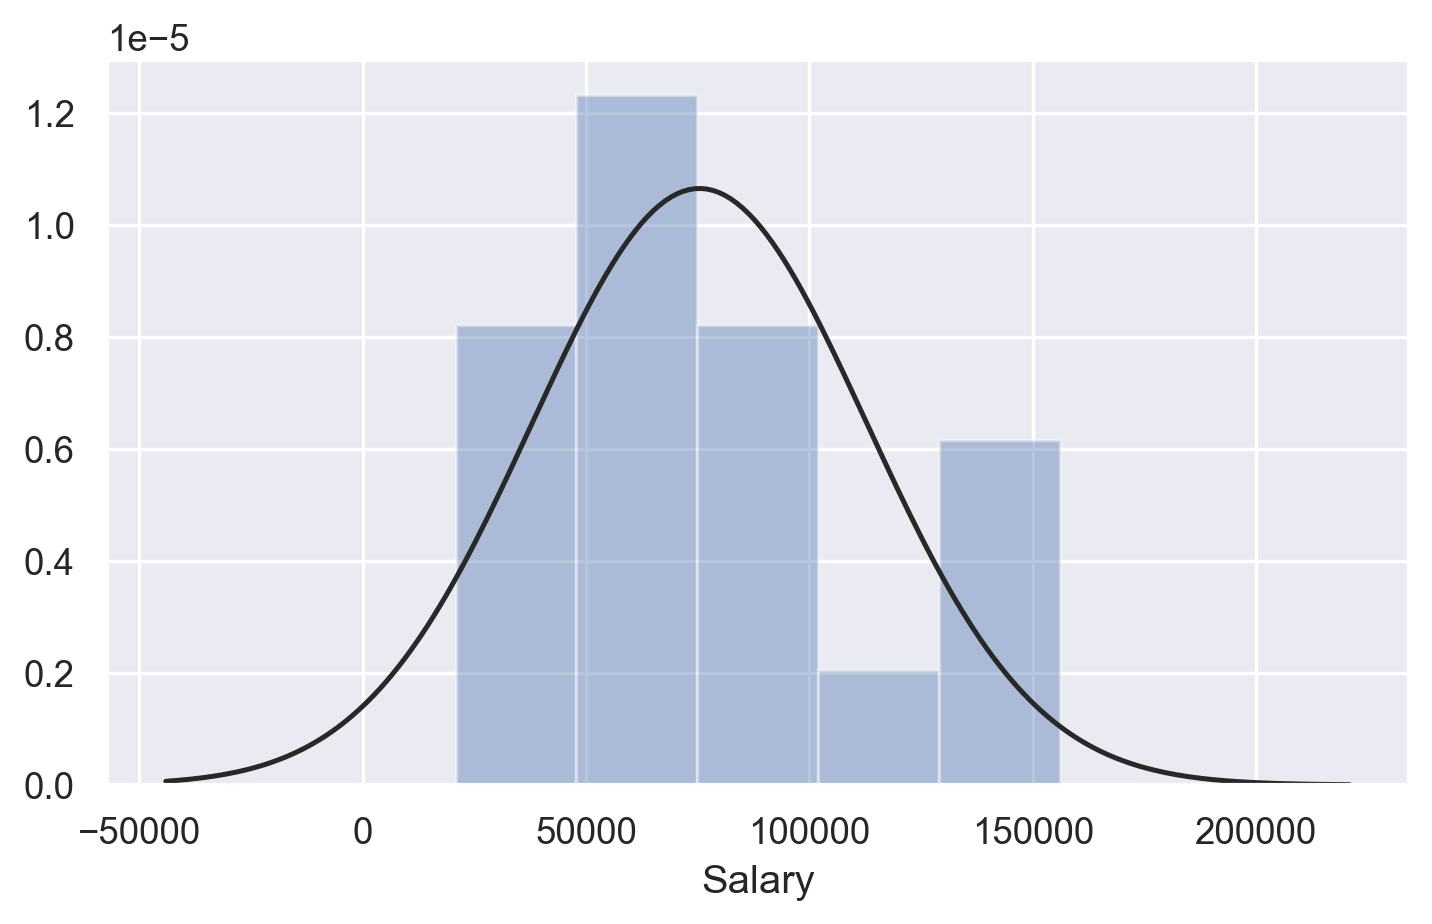

In [239]:
from scipy.stats import norm
sns.distplot(data, kde=False, fit=norm);

This is a first part of our project. Next step, we will perform some EDAs on it, make sure to check that out.